In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
upload = files.upload()

Saving J-function.csv to J-function.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(upload['J-function.csv']))

In [ ]:
df

,Sw %,Sw (fractions),Pc1,Pc2,Pc3,Pc4
0,15,0.15,93.59,28.34,12.82,6.94
1,16,0.16,66.48,20.13,9.10,4.93
2,17,0.17,46.54,14.09,6.37,3.45
3,18,0.18,39.89,12.08,5.46,2.96
4,19,0.19,33.24,10.06,4.55,2.47
5,20,0.20,31.82,9.63,4.36,2.36
6,25,0.25,22.46,6.80,3.08,1.67
7,30,0.30,16.85,5.10,2.31,1.25
8,35,0.35,13.10,3.97,1.79,0.97
9,40,0.40,11.23,3.40,1.54,0.83


In [ ]:
sigma = 72/68947.6 #Interfacial tension, converted from dynes/cm to psi/cm
phi1 = 0.08 #Porosity of core 1, fraction
phi2 = 0.11 #Porosity of core 2, fraction
phi3 = 0.15 #Porosity of core 3, fraction
phi4 = 0.22 #Porosity of core 4, fraction
k1 = ((1/1000)*(0.987*1e-8)) #Permeability of core 1 converted to cm^2
k2 = ((15/1000)*(0.987*1e-8)) #Permeability of core 2 converted to cm^2
k3 = ((100/1000)*(0.987*1e-8)) #Permeability of core 3 converted to cm^2
k4 = ((500/1000)*(0.987*1e-8)) #Permeability of core 4 converted to cm^2
theta = 45 #Wettability, degrees

In [ ]:
df['J1'] = (df['Pc1'] / (sigma * np.cos(np.deg2rad(theta)))) * np.sqrt(k1 / phi1)
df['J2'] = (df['Pc2'] / (sigma * np.cos(np.deg2rad(theta)))) * np.sqrt(k2 / phi2)
df['J3'] = (df['Pc3'] / (sigma * np.cos(np.deg2rad(theta)))) * np.sqrt(k3 / phi3)
df['J4'] = (df['Pc4'] / (sigma * np.cos(np.deg2rad(theta)))) * np.sqrt(k4 / phi4)

In [ ]:
df

,Sw %,Sw (fractions),Pc1,Pc2,Pc3,Pc4,J1,J2,J3,J4
0,15,0.15,93.59,28.34,12.82,6.94,1.407812,1.408022,1.408324,1.407646
1,16,0.16,66.48,20.13,9.10,4.93,1.000014,1.000123,0.999668,0.999956
2,17,0.17,46.54,14.09,6.37,3.45,0.700070,0.700036,0.699768,0.699766
3,18,0.18,39.89,12.08,5.46,2.96,0.600039,0.600173,0.599801,0.600379
4,19,0.19,33.24,10.06,4.55,2.47,0.500007,0.499813,0.499834,0.500992
5,20,0.20,31.82,9.63,4.36,2.36,0.478647,0.478449,0.478962,0.478681
6,25,0.25,22.46,6.80,3.08,1.67,0.337851,0.337846,0.338349,0.338727
7,30,0.30,16.85,5.10,2.31,1.25,0.253463,0.253384,0.253762,0.253538
8,35,0.35,13.10,3.97,1.79,0.97,0.197055,0.197242,0.196638,0.196746
9,40,0.40,11.23,3.40,1.54,0.83,0.168925,0.168923,0.169175,0.168350


Text(0, 0.5, 'Leverett J-Function')

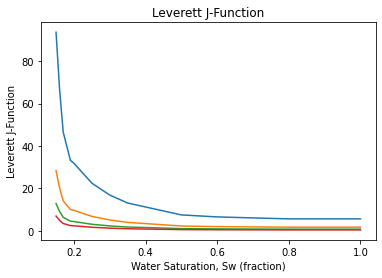

In [ ]:
plt.plot(df['Sw (fractions)'], df['Pc1'])
plt.plot(df['Sw (fractions)'], df['Pc2'])
plt.plot(df['Sw (fractions)'], df['Pc3'])
plt.plot(df['Sw (fractions)'], df['Pc4'])

plt.title('Leverett J-Function')
plt.xlabel('Water Saturation, Sw (fraction)')
plt.ylabel('Leverett J-Function')